In [1]:
import scipy as sp
import scipy.linalg as la
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline
sp.set_printoptions(precision=3, linewidth=300)

# Cálculo das frequências naturais

Consideremos as equações:
\begin{equation}
I_d\ddot{\alpha} + I_p \Omega \dot{\beta} + k \alpha = 0\\
I_d\ddot{\beta} - I_p \Omega \dot{\alpha} + k \beta = 0
\end{equation}

Para encontrarmos as frequências naturais do sistema utilizaremos a formulação no espaço dos estados.

\begin{equation}
\dot{\alpha_1} = \alpha_2 \\
\dot{\beta_1} = \beta_2 \\
\dot{\alpha_2} = -I_d^{-1}(I_p \Omega \beta_2 + k\alpha_1) \\
\dot{\beta_2} = -I_d^{-1}(-I_p \Omega \alpha_2 + k\beta_1)
\end{equation}

Considerando o vetor de estado $[\alpha_1 \ \beta_1 \ \alpha_2 \ \beta_2]^T$, podemos escrever a equação $\dot{\bf x}(t) = A{\bf x}(t)$
Onde:
\begin{equation}
{\bf A} = 
\left[ \matrix{
0 & I \\
-I_d^{-1}K & -I_d^{-1}\Omega G  \\
} \right] \\
\end{equation}

\begin{equation}
{\bf I_d} = 
\left[ \matrix{
 I_d & 0 \\
0 & I_d\\
} \right] \\
{\bf K} = 
\left[ \matrix{
 k & 0 \\
0 & k\\
} \right] \\
{\bf G} = 
\left[ \matrix{
 0 & I_p \\
-I_p & 0\\
} \right] \\
\end{equation}

A solução tem a forma exponencial ${\bf x}(t) = e^{\lambda t} {\bf x}$. 

Substituindo em $\dot{\bf x}(t) = A{\bf x}(t)$ obtemos: $A{\bf x} = \lambda{\bf x}$ que é o problema de autovalor-autovetor.

Iremos agora construir a matriz A considerando as propriedades abaixo:

In [8]:
Id = 7.06
Ip = 13.69
k = 2.97*10e5
w = 100

In [9]:
Id0 = sp.array([[Id, 0],
                [0, Id]])
K = sp.array([[k, 0],
              [0, k]])
G = sp.array([[0, Ip],
              [-Ip, 0]])

In [10]:
I = sp.eye(len(Id0))
Z = sp.zeros_like(Id0)
Idinv = la.inv(Id0)

Montar a matriz A utilizando hstack e vstack:

In [11]:
A = sp.vstack([sp.hstack([         Z,            I]),
               sp.hstack([-Idinv @ K, -Idinv @ G*w])])
A

array([[  0.000e+00,   0.000e+00,   1.000e+00,   0.000e+00],
       [  0.000e+00,   0.000e+00,   0.000e+00,   1.000e+00],
       [ -4.207e+05,   0.000e+00,   0.000e+00,  -1.939e+02],
       [  0.000e+00,  -4.207e+05,   1.939e+02,   0.000e+00]])

Podemos calcular os autovalores e autovetores com a função scipy.linalg.eig()

```
la.eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True)
Docstring:
Solve an ordinary or generalized eigenvalue problem of a square matrix.

Find eigenvalues w and right or left eigenvectors of a general matrix::

Parameters
----------
a : (M, M) array_like
    A complex or real matrix whose eigenvalues and eigenvectors
    
Returns
-------    
w : (M,) double or complex ndarray
    The eigenvalues, each repeated according to its multiplicity.
vl : (M, M) double or complex ndarray
    The normalized left eigenvector corresponding to the eigenvalue
    ``w[i]`` is the column vl[:,i]. Only returned if ``left=True``.
vr : (M, M) double or complex ndarray
    The normalized right eigenvector corresponding to the eigenvalue
    ``w[i]`` is the column ``vr[:,i]``.  Only returned if ``right=True``.
```

In [12]:
la.eig(A)

(array([ 0.+752.76j,  0.-752.76j,  0.+558.85j,  0.-558.85j]),
 array([[ 0.001+0.j   ,  0.001-0.j   ,  0.000-0.001j,  0.000+0.001j],
        [ 0.000-0.001j,  0.000+0.001j,  0.001+0.j   ,  0.001-0.j   ],
        [ 0.000+0.707j,  0.000-0.707j,  0.707+0.j   ,  0.707-0.j   ],
        [ 0.707+0.j   ,  0.707-0.j   ,  0.000+0.707j,  0.000-0.707j]]))

Iremos agora calcular as frequências naturais para um range de velocidades.

In [14]:
omega = sp.linspace(0, 100, 50)

In [15]:
fw = []
bw = []
for w in omega:
    A = sp.vstack([sp.hstack([         Z,            I]),
                   sp.hstack([-Idinv @ K, -Idinv @ G*w])])
    evalues, evects = la.eig(A)
    evalues = sp.sort(evalues.imag)
    wn = (sp.sqrt(evalues)).real
    bw.append(wn[2])
    fw.append(wn[3])

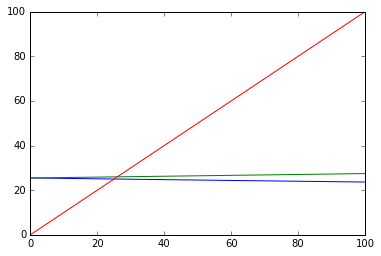

In [16]:
plt.plot(omega, bw)
plt.plot(omega, fw)
plt.plot(omega, omega)

Podemos criar uma função dependente de Ip para avaliarmos a influência desse paramêtro no diagrama de Campbell.

In [17]:
def campbell(Ip):
    Id = 7.06
    k = 2.97*10e5
    omega = (0, 100, 100)
    Id0 = sp.array([[Id, 0],
                    [0, Id]])
    K = sp.array([[k, 0],
                  [0, k]])
    G = sp.array([[0, Ip],
                  [-Ip, 0]])
    
    I = sp.eye(len(Id0))
    Z = sp.zeros_like(Id0)
    Idinv = la.inv(Id0)
    
    fw = []
    bw = []
    for w in omega:
        A = sp.vstack([sp.hstack([         Z,            I]),
                       sp.hstack([-Idinv @ K, -Idinv @ G*w])])
        evalues, evects = la.eig(A)
        evalues = sp.sort(evalues.imag)
        wn = (sp.sqrt(evalues)).real
        bw.append(wn[2])
        fw.append(wn[3])
    plt.plot(omega, bw)
    plt.plot(omega, fw)
    plt.plot(omega, omega)
    

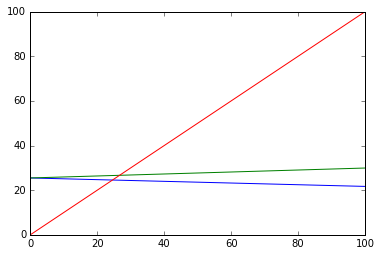

In [18]:
interact(campbell, Ip=(10, 100, 10))